In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [172]:
df = pd.read_csv("hacktrain.csv")
df #ignore the warnings

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [173]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [174]:
#Assigning labels to unique classes

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
print("Class to Label Mapping:")
for label, class_name in enumerate(label_encoder.classes_):
    print(f"{label}: {class_name}")


Class to Label Mapping:
0: farm
1: forest
2: grass
3: impervious
4: orchard
5: water


**Missing Value Imputation**

In [175]:
# df.fillna(df.mean(numeric_only=True), inplace=True) #simple mean imputation [This part has a lot of scope for imporovement.]

group_col = df['class']
target_cols = df[df.columns].select_dtypes(include='number').columns

#using mean imputation but specific class wise
for col in target_cols:
    df[col] = df[col].fillna(df.groupby(group_col)[col].transform('mean'))

df.isnull().sum()


Unnamed: 0    0
ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

**Analysis of data per class**

Class Counts:
class
0     841
1    6159
2     196
3     669
4      30
5     105
Name: count, dtype: int64


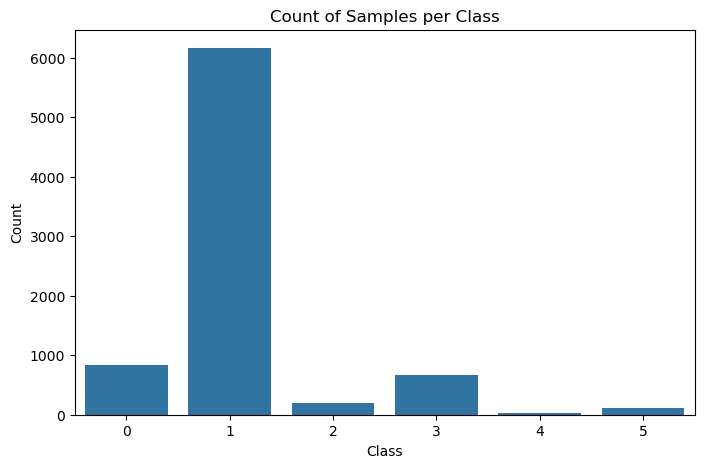

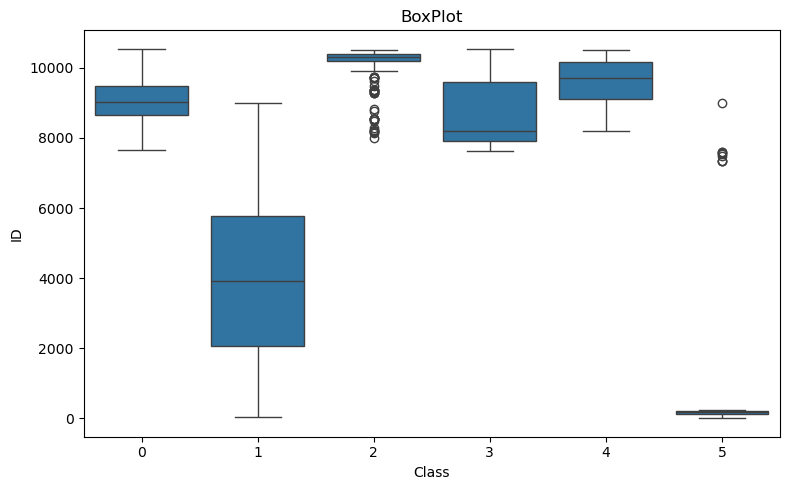

In [176]:
print("Class Counts:")
print(df['class'].value_counts().sort_index())

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title("Count of Samples per Class")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='ID', data=df)
plt.title(f'BoxPlot')
plt.xlabel('Class')
plt.ylabel('ID')
plt.tight_layout()
plt.show()

In [177]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Unnamed: 0,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,5,637.5950,658.668000,-1882.030000,-1924.36,997.904000,-1739.990000,630.087000,527.135156,...,2013.680657,-1043.160,-1942.490000,267.138,1127.101172,987.976689,211.328,-2203.020,-1180.190000,433.906
1,1,5,634.2400,593.705000,-1625.790000,-1672.32,914.198000,-692.386000,707.626000,-1670.590000,...,2013.680657,-933.934,-625.385000,120.059,364.858000,476.972000,220.878,-2250.000,-1360.560000,524.075
2,3,5,58.0174,-1599.160000,1101.121938,-1052.63,1037.900596,-1564.630000,1131.306331,729.790000,...,-1025.880000,368.622,1217.060015,-1227.800,304.621000,987.976689,369.214,-2202.120,973.156134,-1343.550
3,4,5,72.5180,1628.972375,380.436000,-1256.93,515.805000,-1413.180000,-802.942000,683.254000,...,-1813.950000,155.624,1217.060015,-924.073,432.150000,282.833000,298.320,-2197.360,973.156134,-826.727
4,7,5,1136.4400,1628.972375,1101.121938,1647.83,1935.800000,931.040746,2158.980000,527.135156,...,1535.000000,1959.430,-279.317000,-384.915,-113.406000,1020.720000,1660.650,-116.801,-568.050000,-1357.140


**Oversampling of Minority data**

In [188]:
#KMeansSMOTE oversampling technique(creating synthetic samples)

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import KMeans #to optimize clusters as class 4 sample data size is just ~30


X = df.drop(columns=['class'])
y = df['class']

# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# adasyn = ADASYN(random_state=42)
# X_resampled, y_resampled = adasyn.fit_resample(X_scaled, y)

# smote = BorderlineSMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

kmeans_smote = KMeansSMOTE(
    random_state=42,
    kmeans_estimator=KMeans(n_clusters=30, random_state=42),
    cluster_balance_threshold=0.001
)

X_resampled, y_resampled = kmeans_smote.fit_resample(X_scaled, y)

print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts().sort_index())


Resampled class distribution:
class
0    6172
1    6159
2    6163
3    6164
4    6161
5    6160
Name: count, dtype: int64


In [189]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


# Fit multinomial logistic regression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=10
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Convert class labels to strings
class_names = [str(cls) for cls in label_encoder.classes_]

# Now pass that to classification_report
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=class_names
))


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f"{accuracy*100:.2f}")

c:\Users\Arnab Deka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        farm       0.93      0.93      0.93      1234
      forest       0.98      0.98      0.98      1232
       grass       0.94      0.90      0.92      1233
  impervious       0.89      0.91      0.90      1233
     orchard       0.97      1.00      0.98      1232
       water       1.00      0.97      0.98      1232

    accuracy                           0.95      7396
   macro avg       0.95      0.95      0.95      7396
weighted avg       0.95      0.95      0.95      7396

Accuracy: 94.84


c:\Users\Arnab Deka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy with various oversampling algorithms:
1. KMeansSMOTE:     94.84
2. SMOTE:           90.35
3. BorderlineSMOTE: 81.52
4. ADASYN:          78.41

In [190]:
test_data = pd.read_csv("hacktest.csv")
test_data.shape

(2845, 29)

In [191]:
ID=test_data['ID']
test_data.drop(['ID'],axis=1,inplace=True)

In [192]:
y_test = model.predict(test_data)

c:\Users\Arnab Deka\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [193]:
print(y_test)
#print(np.unique(y_test))

[4 4 4 ... 5 3 3]


In [194]:
y_decoded = label_encoder.inverse_transform(y_test)
print(y_decoded)

['orchard' 'orchard' 'orchard' ... 'water' 'impervious' 'impervious']


In [195]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [196]:
result

,ID,class
0,1,orchard
1,2,orchard
2,3,orchard
3,4,orchard
4,5,orchard
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,impervious


In [197]:
result.to_csv("submission.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file